### **Binary Classification with NeuroScope**
Binary classification example using NeuroScope with comprehensive
diagnostic analysis. Demonstrates sigmoid output activation, 
binary crossentropy loss, and specialized binary metrics.

This example covers:
- Binary classification setup
- Sigmoid activation and BCE loss
- Binary-specific metrics and diagnostics

---
**Author:** Ahmad Raza | **Date:** September 2025


#### **Step 1: Import Essential Tools**

Let's start by importing NeuroScope's core components. Each tool serves a specific purpose in our neural network pipeline.

In [1]:
# necessary imports
import numpy as np
from neuroscope import (
    MLP,                    # Our neural network model
    PreTrainingAnalyzer,    # Pre-flight checks before training
    TrainingMonitor,        # Real-time training diagnostics
    PostTrainingEvaluator,  # Final model evaluation
    Visualizer              # Beautiful plots and animations
)

#### **Step 2: Data Generation Functions**

We'll create synthetic data for our binary classification task. 

In [2]:
# generate synthetic data function
def generate_synthetic_data(samples, features=20, classes=None, noise=0.1, random_state=None):
    """Generate synthetic data for classification or regression."""
    rng = np.random.default_rng(random_state)

    if classes is None:
        X = rng.normal(0, 1, size=(samples, features))
        weights = rng.normal(0, 1, size=(features, 1))
        y = X @ weights + noise * rng.normal(0, 1, size=(samples, 1))
        y = y.squeeze()
    else:
        X = rng.normal(0, 1, size=(samples, features))
        weights = rng.normal(0, 1, size=(classes, features))
        logits = X @ weights.T + noise * rng.normal(0, 1, size=(samples, classes))
        y = np.argmax(logits, axis=1)
    
    return X, y
    

#### **Step 3: Data Splitting Strategy**

Proper data splitting is crucial for honest model evaluation. We'll use 70% for training, 15% for validation, and 15% for final testing.

In [3]:
# split data function
def split_data(X, y, train_ratio=0.7, val_ratio=0.15):
    """Split data into train, validation, and test sets."""
    n_samples = X.shape[0]
    n_train = int(n_samples * train_ratio)
    n_val = int(n_samples * val_ratio)

    # Shuffle indices
    indices = np.random.permutation(n_samples)

    # Split indices
    train_idx = indices[:n_train]
    val_idx = indices[n_train : n_train + n_val]
    test_idx = indices[n_train + n_val :]

    return (
        X[train_idx],
        y[train_idx],
        X[val_idx],
        y[val_idx],
        X[test_idx],
        y[test_idx],
    )

#### **Step 4: Create Our Dataset**

Let's generate a binary classification dataset with 2000 samples and 20 features. The `classes=2` parameter creates two distinct classes.

In [4]:
# Generate and split synthetic data
X, y = generate_synthetic_data(samples=2000, features=20, classes=2, noise=0.1, random_state=42)
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y)

#### **Step 5: Verify Data Shapes**
Always check your data dimensions to catch potential issues early. This helps prevent mysterious errors later!

In [5]:
print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Classes in dataset: {len(np.unique(y))}")

#### **Step 6: Design Your Neural Network**

For binary classification, we need:
- **Input layer:** 20 neurons (matching our features)
- **Hidden layers:** 20 → 10 neurons (learning complex patterns)
- **Output layer:** 1 neuron with sigmoid activation (probability output)

In [6]:
# initialize model
model = MLP(
        layer_dims=[20, 20, 10, 1],  # Input -> Hidden -> Hidden -> Output
        hidden_activation="leaky_relu",  # Leaky ReLU for hidden layers
        out_activation="sigmoid",  # Softmax for multi-class classification
        dropout_rate=0.2,  # 0% dropout for regularization
    )


#### **Step 7: Compile the model**

The compilation step sets up our optimizer and regularization. Adam optimizer adapts learning rates automatically, while L2 regularization prevents overfitting.

In [7]:
# Compile the model
model.compile(
        optimizer="adam",  # Adam optimizer
        lr=0.001,  # Learning rate
        reg="l2",  # L2 regularization
        lamda=0.1,  # Regularization strength
    )

                    MLP ARCHITECTURE SUMMARY
Layer        Type               Output Shape    Params    
---------------------------------------------------------------
Layer 1      Input → Hidden     (20,)           420       
Layer 2      Hidden → Hidden    (10,)           210       
Layer 3      Hidden → Output    (1,)            11        
---------------------------------------------------------------
TOTAL                                           641       
Hidden Activation                               leaky_relu
Output Activation                               sigmoid
Optimizer                                       Adam
Learning Rate                                   0.001
Dropout                                         20.0% (normal)
L2 Regularization                               λ = 0.1


#### **Step 8: Pre-Training Analysis**

NeuroScope's pre-training analyzer performs comprehensive checks before training begins. This catches potential issues that could derail training.

In [8]:
# Pre-training analysis
analyzer = PreTrainingAnalyzer(model)
analyzer.analyze(X_train, y_train)

                         NEUROSCOPE PRE-TRAINING ANALYSIS
DIAGNOSTIC TOOL             STATUS       RESULT         NOTE                                      
------------------------------------------------------------------------------------------
Initial Loss Check          PASS         0.7537         Perfect loss init                         
Initialization Validation   PASS         3 layers       Good weight init                          
Layer Capacity Analysis     PASS         641 params     No bottlenecks                            
Architecture Sanity Check   PASS         0I/0W          Architecture is fine                      
Capacity vs Data Ratio      PASS         641 params     Excellent model size                      
Convergence Feasibility     PASS         66.7%          Good convergence potential                
------------------------------------------------------------------------------------------
OVERALL STATUS: ALL SYSTEMS READY
TESTS PASSED: 6/6


#### **Step 9: Training without Real-Time Monitoring**

Now let's train without monitoring thats simple approach.

In [9]:
# training without real-time monitoring
history = model.fit(
        X_train,
        y_train,
        X_val=X_val,
        y_val=y_val,
        epochs=40,
        batch_size=32,
    )


Epoch   1  Train loss: 0.640047, Train Accuracy: 0.6414 Val loss: 0.6576982, Val Accuracy: 0.63667
Epoch   2  Train loss: 0.576967, Train Accuracy: 0.7171 Val loss: 0.5970324, Val Accuracy: 0.70333
Epoch   3  Train loss: 0.520095, Train Accuracy: 0.7729 Val loss: 0.5355028, Val Accuracy: 0.75333
Epoch   4  Train loss: 0.458678, Train Accuracy: 0.8157 Val loss: 0.4709810, Val Accuracy: 0.82000
Epoch   5  Train loss: 0.396059, Train Accuracy: 0.8593 Val loss: 0.4079736, Val Accuracy: 0.85333
Epoch   6  Train loss: 0.329661, Train Accuracy: 0.8914 Val loss: 0.3371116, Val Accuracy: 0.88667
Epoch   7  Train loss: 0.268632, Train Accuracy: 0.9200 Val loss: 0.2816537, Val Accuracy: 0.89000
Epoch   8  Train loss: 0.218372, Train Accuracy: 0.9314 Val loss: 0.2310028, Val Accuracy: 0.92333
Epoch   9  Train loss: 0.184103, Train Accuracy: 0.9471 Val loss: 0.2019403, Val Accuracy: 0.92000
Epoch  10  Train loss: 0.155755, Train Accuracy: 0.9493 Val loss: 0.1725920, Val Accuracy: 0.93667
Epoch  11 

#### **Step 9: Training with Real-Time Monitoring**

Now let's train with NeuroScope's advanced monitoring. Watch the diagnostic indicators - they tell you exactly what's happening inside your network!

In [10]:
# training with real-time monitoring
monitor = TrainingMonitor()
res = model.fit(
        X_train,
        y_train,
        X_val=X_val,
        y_val=y_val,
        epochs=40,
        batch_size=32,
        monitor=monitor
    )


----------------------------------------------------------------------------------------------------
SNR: 🟡 (0.70),     | Dead Neurons: 🟢 (0.00%)  | VGP:      🟢  | EGP:     🟢  | Weight Health: 🟢
WUR: 🟢 (1.15e-03)  | Saturation:   🟢 (0.00)   | Progress: 🟢  | Plateau: 🟢  | Overfitting:   🟡
----------------------------------------------------------------------------------------------------
Epoch   1  Train loss: 0.640047, Train Accuracy: 0.6414 Val loss: 0.6576982, Val Accuracy: 0.63667
----------------------------------------------------------------------------------------------------
SNR: 🟡 (0.80),     | Dead Neurons: 🟢 (0.00%)  | VGP:      🟢  | EGP:     🟢  | Weight Health: 🟢
WUR: 🟢 (1.20e-03)  | Saturation:   🟢 (0.00)   | Progress: 🟢  | Plateau: 🟢  | Overfitting:   🟢
----------------------------------------------------------------------------------------------------
Epoch   2  Train loss: 0.576967, Train Accuracy: 0.7171 Val loss: 0.5970324, Val Accuracy: 0.70333
----------------------

#### **Step 10: Visualize Training Progress**

NeuroScope's visualizer creates high quality plots. The learning curves show how loss decreases and accuracy improves over time.

In [11]:
# Visualizer initialization
viz = Visualizer(res)

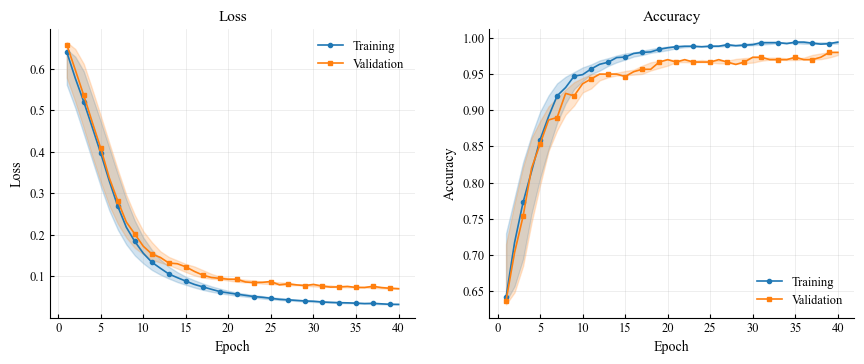

In [12]:
# Plot learning curves with confidence intervals
viz.plot_learning_curves(ci=True)

In [13]:
# Uncomment the line below to see an animated view of your training process. It's mesmerizing to watch your network learn!
#viz.plot_training_animation(bg="light")

#### **Step 11: Final Model Evaluation**

Time for the moment of truth! Let's see how well our model performs on completely unseen test data.

In [14]:
# Post-training evaluation
evaluator = PostTrainingEvaluator(model)
evaluator.evaluate(X_test, y_test)

                  NEUROSCOPE POST-TRAINING EVALUATION
EVALUATION      STATUS       SCORE        NOTE                                         
--------------------------------------------------------------------------------
Robustness      EXCELLENT    0.981        Highly robust to noise                       
Performance     EXCELLENT    0.973        High accuracy and fast inference             
Stability       PASS         0.709        Good prediction stability                    
--------------------------------------------------------------------------------
OVERALL STATUS: EVALUATION COMPLETE
EVALUATIONS PASSED: 3/3
                     CLASSIFICATION METRICS
METRIC               STATUS       SCORE        NOTE                                    
--------------------------------------------------------------------------------
Accuracy             EXCELLENT    0.9733       Outstanding performance                 
Precision            EXCELLENT    0.9734       Outstanding performance 

### **Congratulations!**

You've successfully built and trained your first binary classifier with NeuroScope! 

#### **What You Accomplished:**
- Created a synthetic binary classification dataset
- Designed a neural network architecture
- Used NeuroScope's diagnostic tools
- Monitored training in real-time
- Visualized learning progress
- Evaluated final model performance

#### **Next Steps:**
- Try the **Multiclass Classification** notebook
- Experiment with different architectures
- Adjust hyperparameters and see the effects

**Ready for the next challenge?**